In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
RANDOM_SEED = 42
Labels =  ['A','B','C','D','E','F','G','H','I','J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
NUM_CLASSES = len(Labels)

In [3]:
file_path = '/content/data.csv'
model_save_path = '/content/keypoint_classifier.hdf5'
tflite_save_path = '/content/keypoint_classifier.tflite'

In [4]:
dataset = pd.read_csv(file_path)

In [5]:
dataset.tail()

,label,p,d_4_0,d_8_0,d_12_0,d_16_0,d_20_0,d_4_8,d_8_12,d_12_16,d_16_20,d_4_12,d_4_16,d_4_20,a_4_0_8,a_8_0_12,a_12_0_16,a_16_0_20
29849,35,-1,0.411764,0.220008,0.158875,0.099870,0.061206,0.196276,0.061134,0.059827,0.039154,0.255311,0.314937,0.351230,7.978686,0.114249,4.498457,4.522200
29850,35,-1,0.409341,0.189395,0.119653,0.069935,0.038936,0.223001,0.074799,0.050978,0.031218,0.297741,0.347183,0.375758,7.574267,10.304488,7.062960,4.050158
29851,35,-1,0.451771,0.185264,0.139621,0.104008,0.094532,0.266872,0.056931,0.051368,0.051025,0.318881,0.368412,0.415646,2.765567,12.144712,17.670498,29.288616
29852,35,-1,0.518680,0.214205,0.162899,0.126492,0.102833,0.306094,0.065294,0.046315,0.046862,0.366996,0.412988,0.458911,5.406840,12.411346,11.446476,20.429373
29853,35,-1,0.481601,0.236781,0.196845,0.159081,0.160437,0.267652,0.050997,0.060167,0.057067,0.318649,0.378810,0.432037,18.432791,8.424350,15.210177,20.571290


In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 1:], dataset.iloc[:, 0], train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((X_train.shape[1], )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=100, verbose=1)

In [9]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
343/350 [============================>.] - ETA: 0s - loss: 2.6122 - accuracy: 0.2877
Epoch 1: saving model to /content/keypoint_classifier.hdf5
350/350 [==============================] - 3s 5ms/step - loss: 2.6008 - accuracy: 0.2904 - val_loss: 1.5767 - val_accuracy: 0.5669
Epoch 2/1000
 46/350 [==>...........................] - ETA: 1s - loss: 1.9216 - accuracy: 0.4497

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


349/350 [============================>.] - ETA: 0s - loss: 1.6150 - accuracy: 0.5366
Epoch 2: saving model to /content/keypoint_classifier.hdf5
350/350 [==============================] - 2s 5ms/step - loss: 1.6141 - accuracy: 0.5367 - val_loss: 0.9182 - val_accuracy: 0.7609
Epoch 3/1000
338/350 [===========================>..] - ETA: 0s - loss: 1.0823 - accuracy: 0.6800
Epoch 3: saving model to /content/keypoint_classifier.hdf5
350/350 [==============================] - 2s 4ms/step - loss: 1.0767 - accuracy: 0.6814 - val_loss: 0.6094 - val_accuracy: 0.8462
Epoch 4/1000
338/350 [===========================>..] - ETA: 0s - loss: 0.8589 - accuracy: 0.7413
Epoch 4: saving model to /content/keypoint_classifier.hdf5
350/350 [==============================] - 2s 5ms/step - loss: 0.8588 - accuracy: 0.7411 - val_loss: 0.5271 - val_accuracy: 0.8568
Epoch 5/1000
350/350 [==============================] - ETA: 0s - loss: 0.7741 - accuracy: 0.7666
Epoch 5: saving model to /content/keypoint_classifi

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False
)

In [11]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

59/59 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9511


234/234 [==============================] - 1s 2ms/step


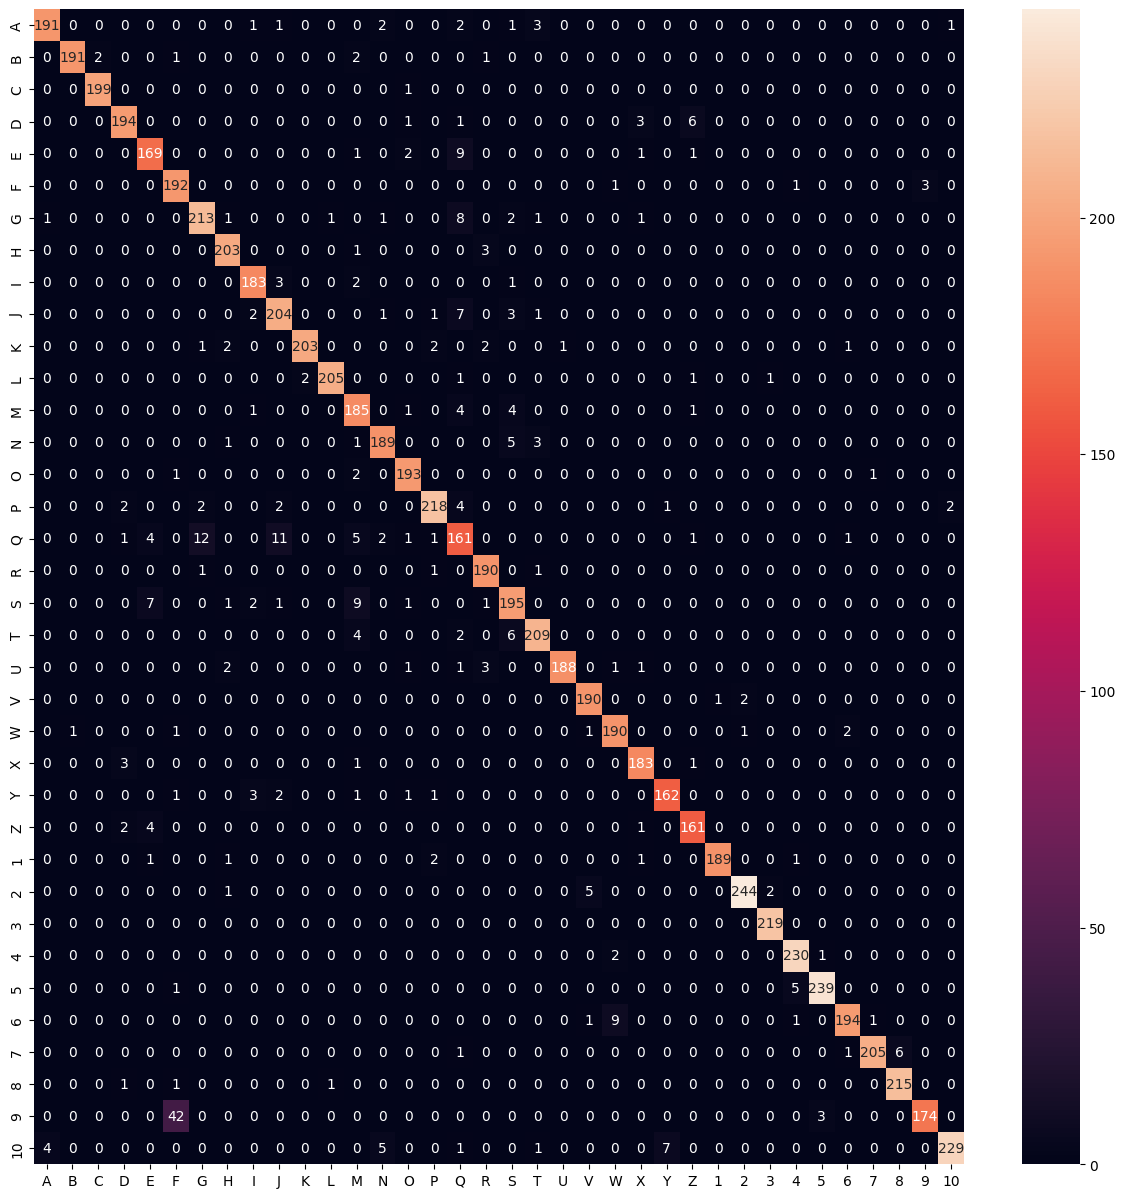

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       202
           1       0.99      0.97      0.98       197
           2       0.99      0.99      0.99       200
           3       0.96      0.95      0.95       205
           4       0.91      0.92      0.92       183
           5       0.80      0.97      0.88       197
           6       0.93      0.93      0.93       229
           7       0.96      0.98      0.97       207
           8       0.95      0.97      0.96       189
           9       0.91      0.93      0.92       219
          10       0.99      0.96      0.97       212
          11       0.99      0.98      0.98       210
          12       0.86      0.94      0.90       196
          13       0.94      0.95      0.95       199
          14       0.96      0.98      0.97       197
          15       0.96      0.94      0.95       231
          16       0.80      0.81      0.80       200
     

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=Labels, columns=Labels)

    fig, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [13]:
model = tf.keras.models.load_model(model_save_path)

In [14]:
predict_result = model.predict(np.array([X_test.iloc[10]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 58ms/step
[1.29809263e-09 7.11727772e-17 1.92319546e-11 1.72244624e-14
 1.53548591e-14 6.74388727e-14 1.18025025e-06 1.70924231e-05
 8.11657870e-14 3.02912704e-15 3.14625249e-05 3.10233922e-11
 3.45265781e-13 2.72688450e-09 1.06230941e-16 1.12329737e-07
 1.33360241e-11 9.99944687e-01 3.13355353e-12 6.07317582e-13
 5.45493958e-06 1.54724622e-13 1.45203825e-12 3.52744012e-15
 8.60761500e-22 2.99536579e-16 2.69067997e-11 1.50645826e-15
 1.15105515e-10 1.70335859e-12 2.09170788e-13 5.55434587e-11
 3.96020619e-13 1.00622592e-11 6.35573927e-10 3.38783152e-15]
17
